# Importind liberaries

**this is a dataset of cocacola's stack from 90s till now 

Link to dataset:https://www.kaggle.com/yiyiwang0826/cocacola-excel

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [82]:
data=pd.read_csv("Desktop/data/COCO COLA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15096 entries, 0 to 15095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15096 non-null  object 
 1   Open       15096 non-null  float64
 2   High       15096 non-null  float64
 3   Low        15096 non-null  float64
 4   Close      15096 non-null  float64
 5   Adj Close  15096 non-null  float64
 6   Volume     15096 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 766.7+ KB


# Preprocessing

I dropped my data column here because that was not numeric, I will transform it somehow to numeric data in the end and I ll apply my model on it  

In [69]:
data=data.drop("Date",axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.263021,0.270182,0.263021,0.263021,0.051133,806400
1,1962-01-03,0.259115,0.259115,0.253255,0.257161,0.049994,1574400
2,1962-01-04,0.257813,0.261068,0.257813,0.259115,0.050374,844800
3,1962-01-05,0.259115,0.262370,0.252604,0.253255,0.049234,1420800
4,1962-01-08,0.251302,0.251302,0.245768,0.250651,0.048728,2035200


**There are lots of datas so i don't need them all I'll just take the last 10 years using the algorythim below

In [84]:
data=data[12084:][:]
print(data.shape)
data.head()

(3012, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
12084,2010-01-04,28.580000,28.610001,28.450001,28.520000,19.646149,13870400
12085,2010-01-05,28.424999,28.495001,28.070000,28.174999,19.408504,23172400
12086,2010-01-06,28.174999,28.219999,27.990000,28.165001,19.401609,19264600
12087,2010-01-07,28.165001,28.184999,27.875000,28.094999,19.353390,13234600
12088,2010-01-08,27.730000,27.820000,27.375000,27.575001,18.995188,28712400


Because I have dropped some data indexing messed up so I should re-index my dataset

In [88]:
data.index=range(0,3012)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,28.580000,28.610001,28.450001,28.520000,19.646149,13870400
1,2010-01-05,28.424999,28.495001,28.070000,28.174999,19.408504,23172400
2,2010-01-06,28.174999,28.219999,27.990000,28.165001,19.401609,19264600
3,2010-01-07,28.165001,28.184999,27.875000,28.094999,19.353390,13234600
4,2010-01-08,27.730000,27.820000,27.375000,27.575001,18.995188,28712400


We see that there are tons of correlation between values except volume so there should some how be a positive linear relation

<AxesSubplot:>

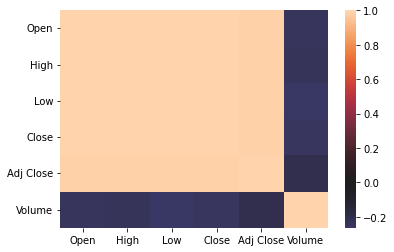

In [90]:
sb.heatmap(data.corr(),center=0)

This plot shows that we have a good linear relation so it would be our best choise to use linear-regression instead of k-neighbours 
**but**
I will also test that to see the result

C:\Users\mahyar_fardin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


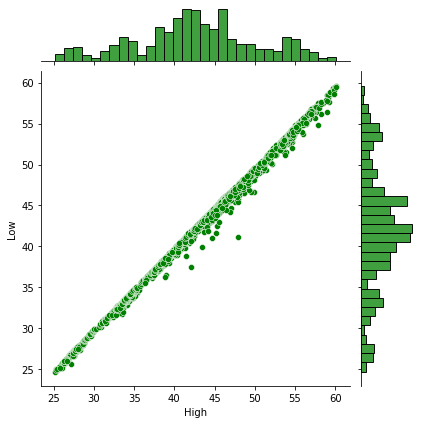

In [92]:
sb.jointplot(data.High,data.Low,color="green")

Here istad of predicting datasets own datas I tried to make an avrage of max min open and close parameters 
**Because it would be more logical(I think)**

In [94]:
######data.mean()#########
#Open         1.605620e+01
#High         1.618843e+01
#Low          1.592188e+01
#Close        1.606073e+01
#Adj Close    1.136749e+01
#Volume       9.032904e+06
Sum=[]
for x in range(0,len(data["Close"])):
    Sum.append(data["Open"][x]+data["Close"][x]+data["High"][x]+data["Low"][x])

In [95]:
Sum=pd.DataFrame(Sum,columns=["sum"])

,sum
0,114.160002
1,113.164999
2,112.549999
3,112.319999
4,110.500001
...,...
3007,229.629997
3008,230.770001
3009,231.890003
3010,233.410005


We have a good normal distribution in sum axis around 170

<AxesSubplot:ylabel='Count'>

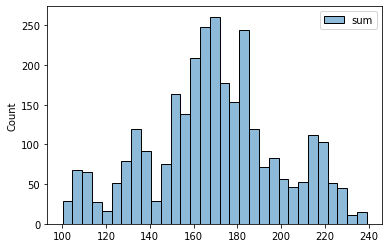

In [96]:
sb.histplot(Sum)

In [108]:
y=pd.DataFrame(data["Close"])
x=pd.DataFrame(data.drop("Close",axis=1))

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# First: LinearRegression

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
lr=LinearRegression()

In [114]:
lr.fit(x_train,y_train)

LinearRegression()

In [115]:
prediction=lr.predict(x_test)

In [120]:
import matplotlib.pyplot as plt

# Evaluateing LR model using plot

As we see there is a good mode we have becase it is a total line except one noise we see around **45** so that is a perfect model

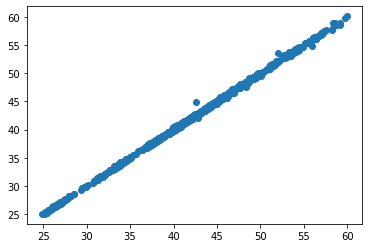

In [122]:
plt.scatter(prediction,y_test)

In [124]:
metrics.mean_absolute_error(prediction,y_test)

0.12376392004426097

In [125]:
metrics.mean_squared_error(prediction,y_test)

0.03398041867924089

# Second: KNeighborsRegressor

I know that this model won't work well because it is for non-linear data but I will use it :)

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [128]:
knnr=KNeighborsRegressor()

In [129]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [130]:
predic_knnr=knnr.predict(x_test)

# Evaluating KNN

As we see the model is not perfect and we totally break the linear relation between parameters

**So** we messed up everything

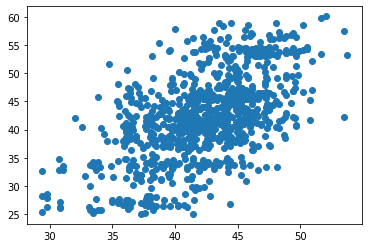

In [131]:
plt.scatter(predic_knnr,y_test)

In [133]:
metrics.mean_absolute_error(predic_knnr,y_test)

4.846773255088496

**AS A CONCLIDION** 

This was a usuall dataset with a predictive relation(because the price is an independent parameter) we had a good linear relation so linear-regression(prejudged from the name) is the best chois for us